# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [250]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt # for the datestamp on the output
import json
from pprint import pprint
import seaborn as sb


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [251]:
# List for holding coordinates(lat and longs) and cities
coordinates = []
cities = []
country = []
latitud = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    #lats,longs= coord
    city = citipy.nearest_city(coord[0], coord[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country.append(city.country_code)
        latitud.append(coord[0])
        longitude.append(coord[1])

# Print the city count to confirm sufficient count
print("Cities", len(cities))
print("Country", len(country))
print("Lats", len(latitud))
print("Longs", len(longitude))

Cities 1500
Country 1500
Lats 1500
Longs 1500


In [252]:
# Creting the DataFrame with the nearest cities from the random coordinates 
city_dict={
    "Latitud":latitud,"Longitude":longitude,"City":cities,"Country":country}

cities_df= pd.DataFrame.from_dict(city_dict,orient='index').transpose()
cities_df


,Latitud,Longitude,City,Country
0,-64.793732,-15.392117,cape town,za
1,-24.4305,176.765862,isangel,vu
2,6.765599,74.03242,dhidhdhoo,mv
3,-71.119644,-37.269194,ushuaia,ar
4,59.764163,-67.310481,iqaluit,ca
...,...,...,...,...
1495,4.518998,-108.436153,ixtapa,mx
1496,30.168665,30.383776,madinat sittah uktubar,eg
1497,-71.875545,165.064167,bluff,nz
1498,-9.167353,-14.316896,georgetown,sh


In [253]:
cities_clean = cities_df.drop_duplicates("City",keep="first")
cities_clean

,Latitud,Longitude,City,Country
0,-64.793732,-15.392117,cape town,za
1,-24.4305,176.765862,isangel,vu
2,6.765599,74.03242,dhidhdhoo,mv
3,-71.119644,-37.269194,ushuaia,ar
4,59.764163,-67.310481,iqaluit,ca
...,...,...,...,...
1479,41.947671,24.808689,asenovgrad,bg
1488,50.300535,-52.893365,bonavista,ca
1489,33.588494,149.736949,hasaki,jp
1493,22.644549,106.875439,cao bang,vn


In [254]:
# Reindex DataFrame
cities_clean= cities_clean.reset_index(drop=True)
len(cities_clean)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [255]:
#Weather information, saving config information

# New URL "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

url_current = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set lists to replace latitud and longitude for nearest city to actual coordinates of city
actual_lat = []
actual_long = []

# Setting new weather parameters to retrieve

maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
infoDate = []
city_success = []

# Variables used in the for loop for printings
# Printing the number of record 
num_record = 0
# Printing the number of set starting from 1 changing the number of sets
num_set = 1
# Printing the name of the current city
city_curr= []
country_success =[]

# Printing first message of retrieval of data
print('''Beginning Data Retrieval     
-----------------------------''')

# Looping through all the cities for weather information retrieving
for index,row in cities_clean.iterrows():
    curr_city= row["City"]
    curr_country= row["Country"]
      
# Build query URL
    query_url =f"{url_current}q={curr_city},{curr_country}&units={units}&appid={weather_api_key}"
               
                
    response= requests.get(query_url).json()
    #print(response)
# Creating Exceptions to continue runnig the code
    num_record = num_record + 1
    try:
        actual_lat.append(response["coord"]["lat"])
        actual_long.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        infoDate.append(response["dt"])
        city_success.append(curr_city)
        country_success.append(curr_country)
        
        # Integrating the information retrieved
       
        
        print(f"Processing Record {num_record} of Set {num_set}| {curr_city}")
        
    except:
        #actual_lat.append(np.nan)
        #actual_long.append(np.nan)
        #maxTemp.append(np.nan)
        #humidity.append(np.nan)
        #windSpeed.append(np.nan)
        #cloudiness.append(np.nan)
        #infoDate.append(np.nan)
        print(f"City not found. Skipping...")
        
        if num_record == 35:
            num_set = num_set+1
            num_record = 0
            # Time between them
            time.sleep(6)
            
    #if index == 5:
     #   break
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| cape town
Processing Record 2 of Set 1| isangel
Processing Record 3 of Set 1| dhidhdhoo
Processing Record 4 of Set 1| ushuaia
Processing Record 5 of Set 1| iqaluit
Processing Record 6 of Set 1| nanortalik
Processing Record 7 of Set 1| tasiilaq
Processing Record 8 of Set 1| half moon bay
Processing Record 9 of Set 1| tarko-sale
Processing Record 10 of Set 1| komsomolskiy
Processing Record 11 of Set 1| egvekinot
Processing Record 12 of Set 1| gondar
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1| la ronge
Processing Record 16 of Set 1| russell
Processing Record 17 of Set 1| vanimo
Processing Record 18 of Set 1| busselton
Processing Record 19 of Set 1| port elizabeth
Processing Record 20 of Set 1| port said
Processing Record 21 of Set 1| lorengau
Processing Record 22 of Set 1| dikson
Processing Record 23 of Set 1| tura
Processing Record 24 of Set 1| fortuna
Proc

Processing Record 207 of Set 1| ishinomaki
Processing Record 208 of Set 1| mitrofanovka
City not found. Skipping...
City not found. Skipping...
Processing Record 211 of Set 1| cayenne
Processing Record 212 of Set 1| high rock
Processing Record 213 of Set 1| houston
Processing Record 214 of Set 1| mollendo
Processing Record 215 of Set 1| grand gaube
City not found. Skipping...
Processing Record 217 of Set 1| hofn
Processing Record 218 of Set 1| tacoronte
Processing Record 219 of Set 1| karabuk
Processing Record 220 of Set 1| miles city
City not found. Skipping...
Processing Record 222 of Set 1| seymchan
Processing Record 223 of Set 1| comodoro rivadavia
Processing Record 224 of Set 1| cockburn town
Processing Record 225 of Set 1| marsh harbour
Processing Record 226 of Set 1| smidovich
Processing Record 227 of Set 1| thompson
Processing Record 228 of Set 1| porkhov
Processing Record 229 of Set 1| san carlos de bariloche
Processing Record 230 of Set 1| yar-sale
Processing Record 231 of Se

Processing Record 411 of Set 1| lardos
Processing Record 412 of Set 1| guerrero negro
Processing Record 413 of Set 1| souillac
Processing Record 414 of Set 1| eenhana
Processing Record 415 of Set 1| hazorasp
Processing Record 416 of Set 1| buraydah
Processing Record 417 of Set 1| venado
Processing Record 418 of Set 1| bilibino
Processing Record 419 of Set 1| bintulu
Processing Record 420 of Set 1| konya
Processing Record 421 of Set 1| sao gabriel da cachoeira
Processing Record 422 of Set 1| hualmay
Processing Record 423 of Set 1| anupgarh
Processing Record 424 of Set 1| port hedland
Processing Record 425 of Set 1| ocean city
Processing Record 426 of Set 1| kungurtug
Processing Record 427 of Set 1| port hardy
Processing Record 428 of Set 1| maragogi
Processing Record 429 of Set 1| miranda
City not found. Skipping...
City not found. Skipping...
Processing Record 432 of Set 1| north myrtle beach
Processing Record 433 of Set 1| elko
Processing Record 434 of Set 1| santiago
Processing Recor

City not found. Skipping...
Processing Record 617 of Set 1| hervey bay
Processing Record 618 of Set 1| porto novo
Processing Record 619 of Set 1| rawson
Processing Record 620 of Set 1| saint-joseph
Processing Record 621 of Set 1| kodinsk
Processing Record 622 of Set 1| namwala
Processing Record 623 of Set 1| xichang
Processing Record 624 of Set 1| bon accord
Processing Record 625 of Set 1| tarakan
City not found. Skipping...
Processing Record 627 of Set 1| san vicente
Processing Record 628 of Set 1| asenovgrad
Processing Record 629 of Set 1| bonavista
Processing Record 630 of Set 1| hasaki
Processing Record 631 of Set 1| cao bang
Processing Record 632 of Set 1| madinat sittah uktubar
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [283]:
# Print the city count to confirm sufficient count
print("City", len(city_success))
print("Lat", len(actual_lat))
print("Lng", len(actual_long))
print("Max Temp", len(maxTemp))
print("Humidity", len(humidity))
print("Cloudiness", len(cloudiness))
print("Wind Speed", len(windSpeed))
print("Country", len(country_success))
print("Date", len(infoDate))


City 570
Lat 570
Lng 570
Max Temp 570
Humidity 570
Cloudiness 570
Wind Speed 570
Country 570
Date 570


In [284]:
# Display the DataFrame
cities_weather_df= pd.DataFrame({"City":city_success,"Lat":actual_lat,"Lng":actual_long,"Max Temp":maxTemp,
                                 "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,
                                 "Country":country_success,"Date":infoDate})

In [285]:
# Save dataframe in output_data file. Export the city data into a .csv.

cities_weather_df.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [286]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,57.99,82,0,8.05,za,1619736414
1,isangel,-19.5500,169.2667,77.00,78,75,6.91,vu,1619736705
2,dhidhdhoo,6.8833,73.1000,83.23,74,100,6.22,mv,1619736654
3,ushuaia,-54.8000,-68.3000,34.88,87,100,4.45,ar,1619736706
4,iqaluit,63.7506,-68.5145,32.00,100,90,4.61,ca,1619736706
...,...,...,...,...,...,...,...,...,...
565,asenovgrad,42.0167,24.8667,57.20,82,35,8.05,bg,1619736930
566,bonavista,48.6499,-53.1147,44.60,76,86,3.44,ca,1619736930
567,hasaki,35.7333,140.8333,64.40,59,20,6.91,jp,1619736931
568,cao bang,22.6667,106.2500,66.34,87,93,0.74,vn,1619736931


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [287]:
stats = cities_weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.245571,18.012440,60.804947,71.371930,55.940351,7.605596,1.619737e+09
std,33.868504,90.510751,18.148972,21.440855,38.230040,5.023538,8.828419e+01
min,-54.800000,-179.166700,-1.430000,6.000000,0.000000,0.130000,1.619736e+09
25%,-9.082625,-61.831350,47.602500,63.000000,17.500000,3.655000,1.619737e+09
50%,24.135500,24.729900,64.325000,76.000000,74.500000,6.350000,1.619737e+09
75%,47.256000,98.510750,76.135000,87.000000,90.000000,10.375000,1.619737e+09
max,78.218600,179.316700,99.000000,100.000000,100.000000,27.000000,1.619737e+09


In [288]:
cities_weather_df.value_counts()

City             Lat       Lng        Max Temp  Humidity  Cloudiness  Wind Speed  Country  Date      
adrar             25.7500  -1.0000    82.22     28        27          19.15       dz       1619736763    1
port alfred      -33.5906   26.8910   63.81     73        100         13.38       za       1619736717    1
pindushi          62.9152   34.5800   29.62     75        53          5.03        ru       1619736730    1
pisco            -13.7000  -76.2167   66.99     88        0           6.91        pe       1619736768    1
plettenberg bay  -34.0527   23.3716   56.93     82        87          5.44        za       1619736741    1
                                                                                                        ..
husavik           66.0449  -17.3389   37.40     87        90          9.22        is       1619736743    1
hurghada          27.2574   33.8129   80.60     16        0           10.36       eg       1619736738    1
hualmay          -11.0964  -77.6139   67.9

In [289]:
#  Get the indices of cities that have humidity over 100%.
hum = cities_weather_df.loc[(cities_weather_df["Humidity"] > 100),:]


In [290]:
# No citis with Humidity > 100
print(hum)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [291]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop_duplicates("City",keep="first")
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,57.99,82,0,8.05,za,1619736414
1,isangel,-19.5500,169.2667,77.00,78,75,6.91,vu,1619736705
2,dhidhdhoo,6.8833,73.1000,83.23,74,100,6.22,mv,1619736654
3,ushuaia,-54.8000,-68.3000,34.88,87,100,4.45,ar,1619736706
4,iqaluit,63.7506,-68.5145,32.00,100,90,4.61,ca,1619736706
...,...,...,...,...,...,...,...,...,...
565,asenovgrad,42.0167,24.8667,57.20,82,35,8.05,bg,1619736930
566,bonavista,48.6499,-53.1147,44.60,76,86,3.44,ca,1619736930
567,hasaki,35.7333,140.8333,64.40,59,20,6.91,jp,1619736931
568,cao bang,22.6667,106.2500,66.34,87,93,0.74,vn,1619736931


In [292]:
clean_city_data.reset_index()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,cape town,-33.9258,18.4232,57.99,82,0,8.05,za,1619736414
1,1,isangel,-19.5500,169.2667,77.00,78,75,6.91,vu,1619736705
2,2,dhidhdhoo,6.8833,73.1000,83.23,74,100,6.22,mv,1619736654
3,3,ushuaia,-54.8000,-68.3000,34.88,87,100,4.45,ar,1619736706
4,4,iqaluit,63.7506,-68.5145,32.00,100,90,4.61,ca,1619736706
...,...,...,...,...,...,...,...,...,...,...
565,565,asenovgrad,42.0167,24.8667,57.20,82,35,8.05,bg,1619736930
566,566,bonavista,48.6499,-53.1147,44.60,76,86,3.44,ca,1619736930
567,567,hasaki,35.7333,140.8333,64.40,59,20,6.91,jp,1619736931
568,568,cao bang,22.6667,106.2500,66.34,87,93,0.74,vn,1619736931


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

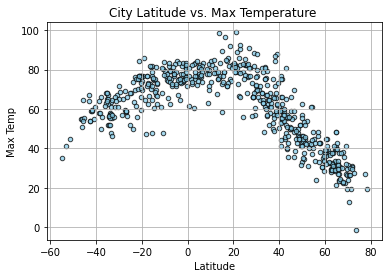

<Figure size 432x288 with 0 Axes>

In [293]:
# Create a scatter plot which compares MPG to horsepower
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Max Temperature ")
plt.grid (b=True, which="major",axis="both",linestyle="-") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/Fig-1_Latitude_vs_Max Temp.png")

## Latitude vs. Humidity Plot

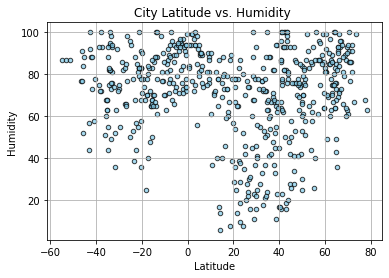

<Figure size 432x288 with 0 Axes>

In [294]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Humidity ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Figures/Fig-2_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

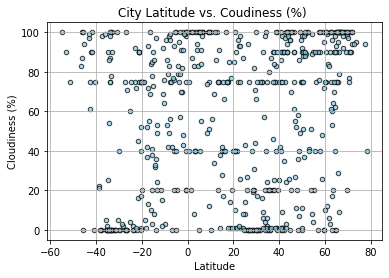

<Figure size 432x288 with 0 Axes>

In [295]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Coudiness (%) ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

plt.savefig("Figures/Fig-3_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

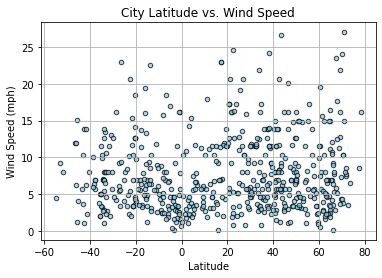

<Figure size 432x288 with 0 Axes>

In [296]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Wind Speed ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  

plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major",axis="both",linestyle="-") 
plt.show()

plt.savefig("Figures/Fig-4_Latitude_vs_Wind Speed.png")

## Linear Regression

In [297]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

Northern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] > 0]

Southern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] < 0]

In [298]:
Northern_Hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,dhidhdhoo,6.8833,73.1000,83.23,74,100,6.22,mv,1619736654
4,iqaluit,63.7506,-68.5145,32.00,100,90,4.61,ca,1619736706
5,nanortalik,60.1432,-45.2371,37.72,83,10,9.91,gl,1619736706
6,tasiilaq,65.6145,-37.6368,32.00,93,75,6.91,gl,1619736707
7,half moon bay,37.4636,-122.4286,75.00,82,90,13.80,us,1619736707
...,...,...,...,...,...,...,...,...,...
565,asenovgrad,42.0167,24.8667,57.20,82,35,8.05,bg,1619736930
566,bonavista,48.6499,-53.1147,44.60,76,86,3.44,ca,1619736930
567,hasaki,35.7333,140.8333,64.40,59,20,6.91,jp,1619736931
568,cao bang,22.6667,106.2500,66.34,87,93,0.74,vn,1619736931


In [299]:
Southern_Hemisphere 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,57.99,82,0,8.05,za,1619736414
1,isangel,-19.5500,169.2667,77.00,78,75,6.91,vu,1619736705
3,ushuaia,-54.8000,-68.3000,34.88,87,100,4.45,ar,1619736706
13,russell,-35.2613,174.1236,68.00,68,2,5.01,nz,1619736710
14,vanimo,-2.6741,141.3028,82.06,76,82,2.80,pg,1619736710
...,...,...,...,...,...,...,...,...,...
554,lubango,-14.9172,13.4925,60.64,70,86,1.25,ao,1619736855
555,hervey bay,-25.2986,152.8535,68.00,96,60,4.00,au,1619736926
557,rawson,-43.3002,-65.1023,64.17,57,99,5.68,ar,1619736926
558,saint-joseph,-21.3667,55.6167,77.00,83,90,3.44,re,1619736927


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [300]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7752458182529661


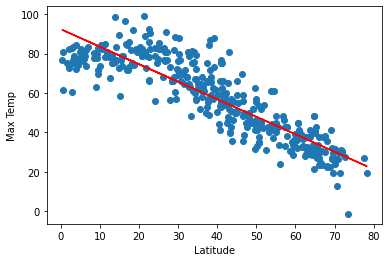

<Figure size 432x288 with 0 Axes>

In [301]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-5_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [302]:
### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5338235046351688


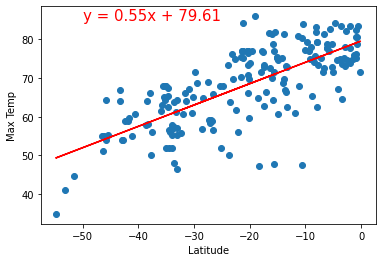

<Figure size 432x288 with 0 Axes>

In [303]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-6_SouthHemphere_Latitude_vs_MaxTemp_ LinearRegression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024597123243609405


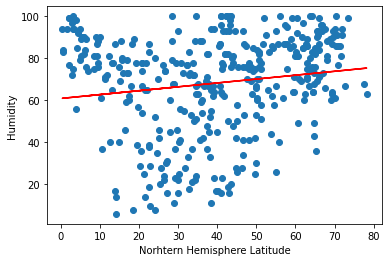

<Figure size 432x288 with 0 Axes>

In [304]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Figures/Fig-7_NortHemphere_Latitude_vs_Humidity_ LinearRegression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02464288603062598


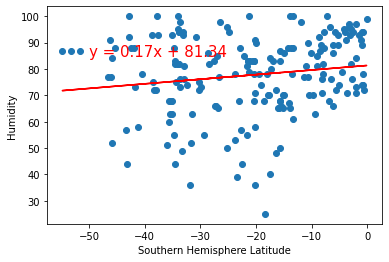

<Figure size 432x288 with 0 Axes>

In [305]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-8_SouthHemphere_Latitude_vs_Humidity_ LinearRegression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03495442547841828


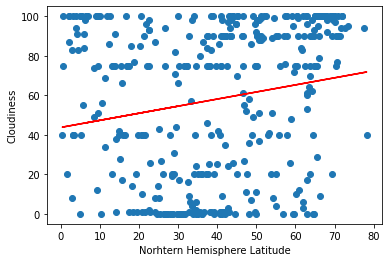

<Figure size 432x288 with 0 Axes>

In [306]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-9_NortHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021450968334713705


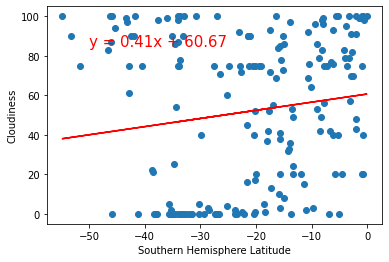

<Figure size 432x288 with 0 Axes>

In [307]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-10_SouthHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0026582247803532888


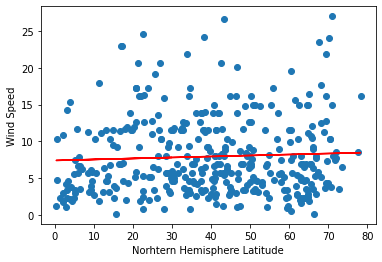

<Figure size 432x288 with 0 Axes>

In [308]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-11_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015047662618754072


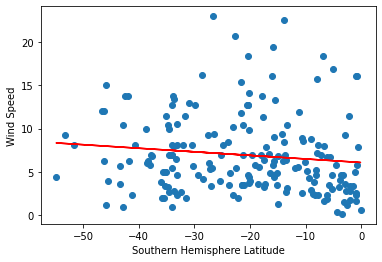

<Figure size 432x288 with 0 Axes>

In [310]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig("Figures/Fig12_SouthHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")